In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Data Science\udemy\Notebooks\DATA\cement_slump.csv')

In [3]:

df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [6]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445656
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331522
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444380
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254320
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037909
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160610
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154532
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223499
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124189
Compressive Strength (28-day)(Mpa),0.445656,-0.331522,0.444380,-0.254320,-0.037909,-0.160610,-0.154532,-0.223499,-0.124189,1.000000


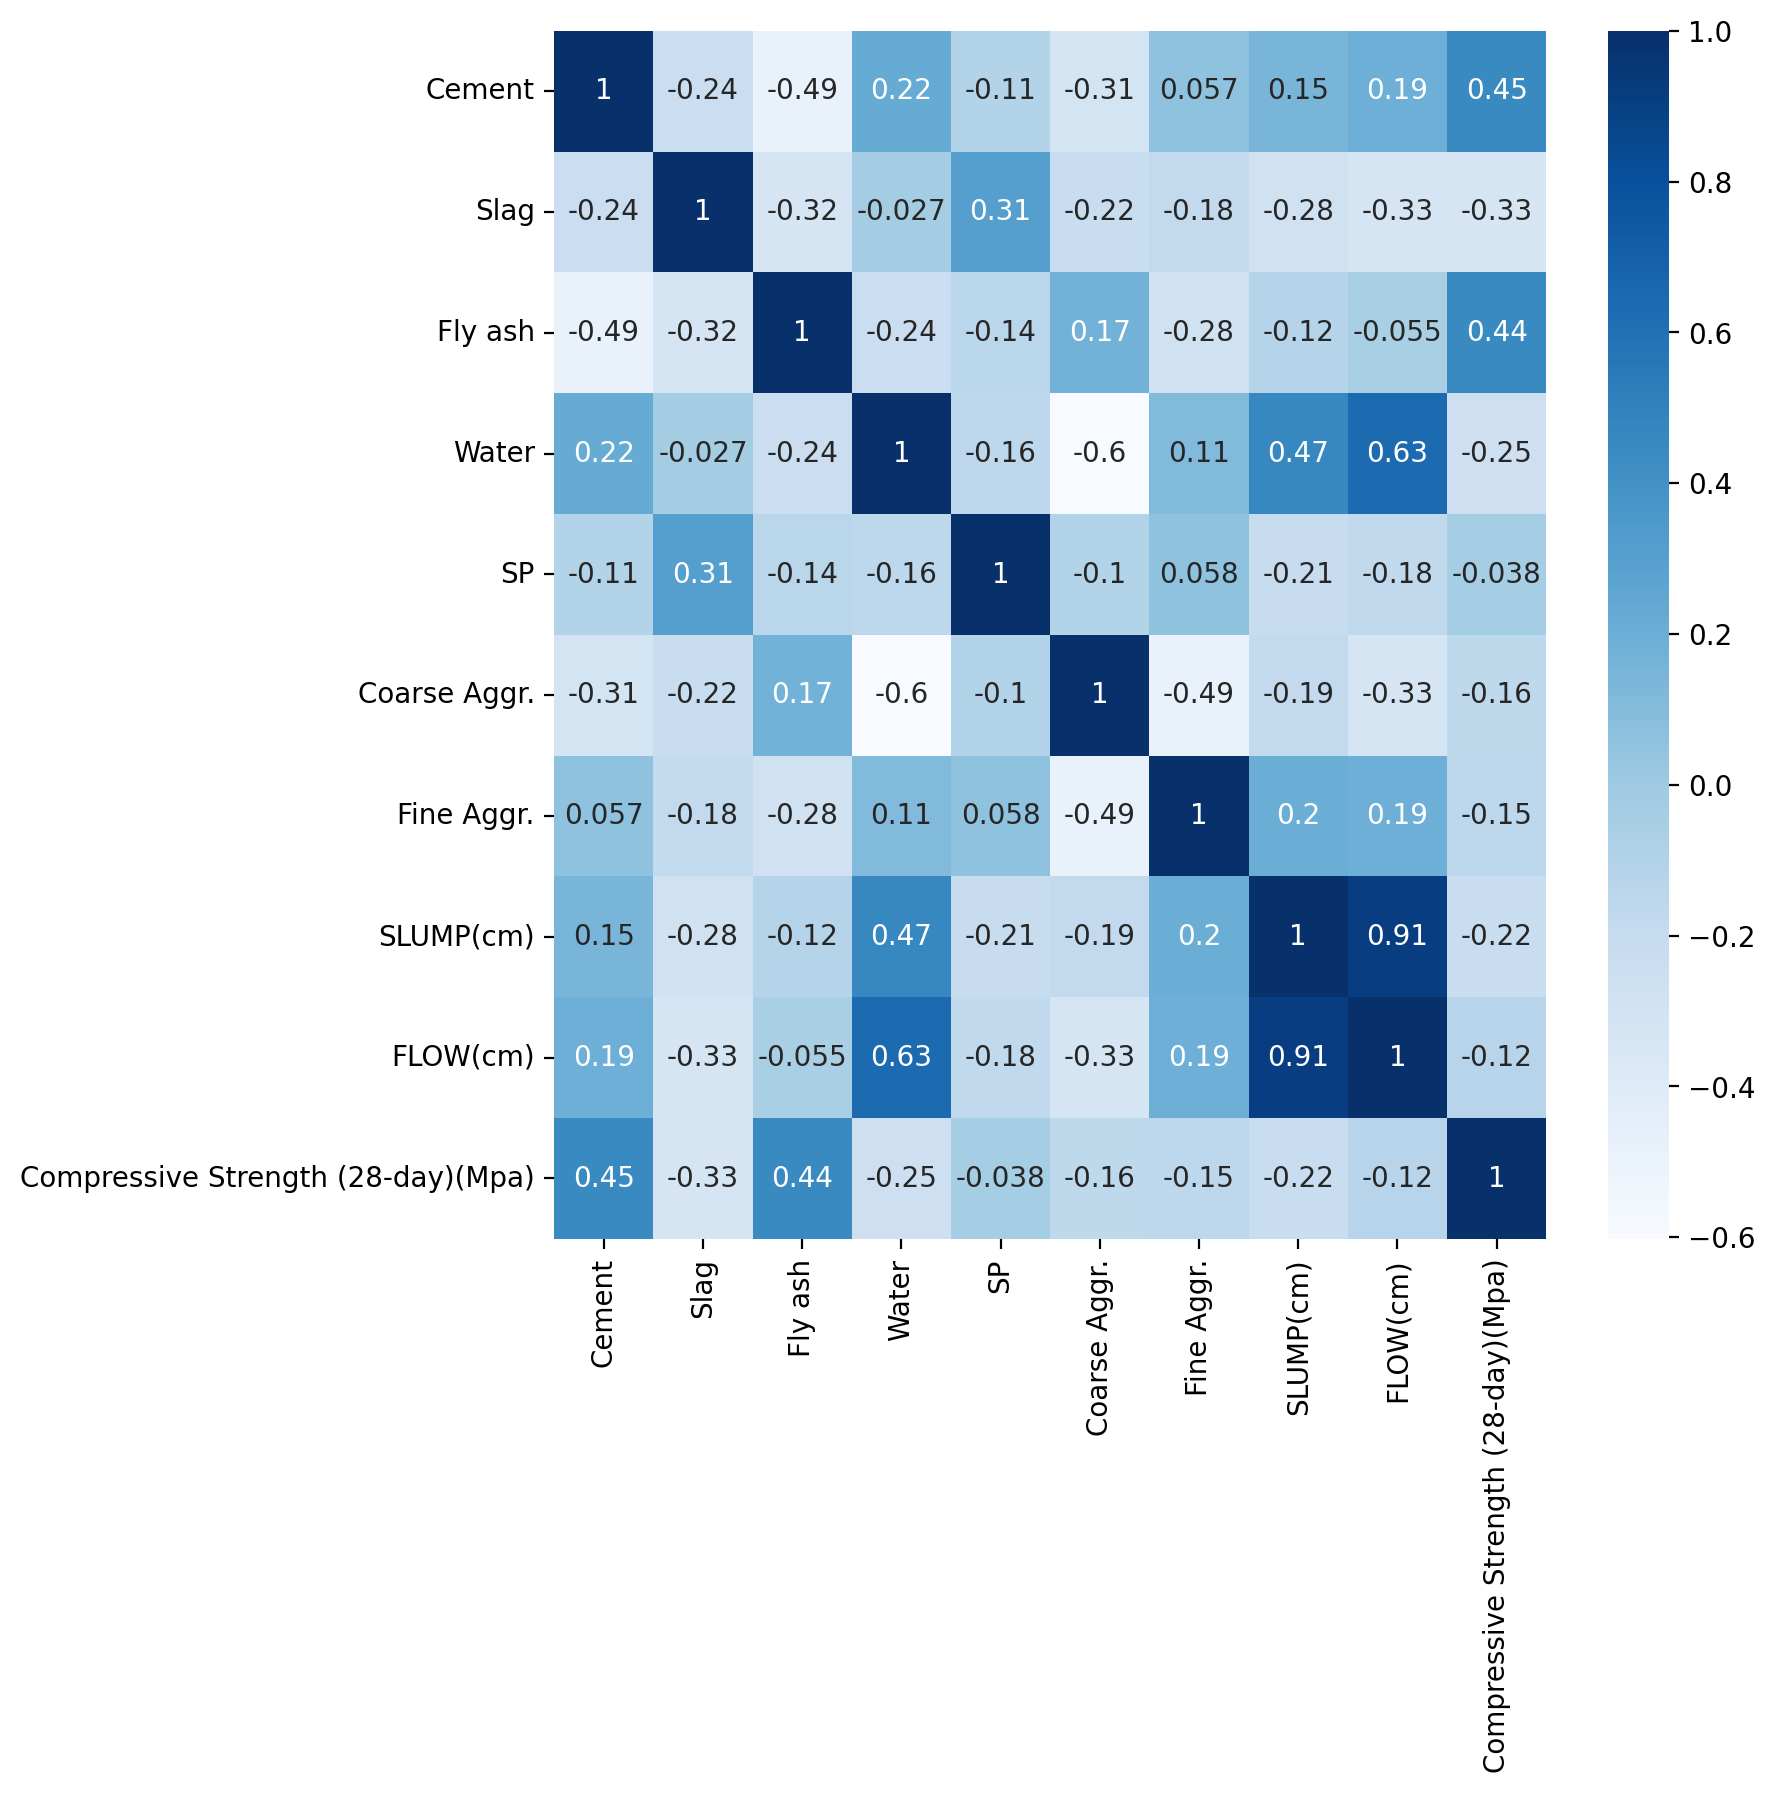

In [10]:
plt.figure(figsize=(8, 8), dpi = 200)
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

In [20]:
df.rename(columns = {df.columns[-1]: 'output' }, inplace=True)

In [21]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),output
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


In [22]:
X = df.drop('output', axis=1)

In [24]:
y = df['output']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [27]:
from sklearn.preprocessing import StandardScaler 

In [43]:
S_X_train = StandardScaler().fit_transform(X_train)
S_X_test = StandardScaler().fit_transform(X_test)

In [33]:
from sklearn.svm import SVR, LinearSVR

In [44]:
svr = SVR()

In [45]:
svr.fit(S_X_train, y_train)

SVR()

In [46]:
b_y_pred = svr.predict(S_X_test)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
MAE = mean_absolute_error(y_test, b_y_pred)

In [51]:
MSE = mean_squared_error(y_test, b_y_pred)

In [52]:
MSE**0.5

6.133750711478423

In [53]:
y_test.mean()

36.718387096774194

In [55]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1],
             'kernel': ['linear', 'rbf', 'poly'],
             'gamma': ['scaler', 'auto'],
             'degree': [2,3,4,5],
             'epsilon':[0.0, 0.01, 0.1, 0.5, 1, 2]}

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
svr = SVR()

In [60]:
grid_model = GridSearchCV(svr, param_grid)

In [63]:
grid_model.fit(S_X_train, y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1800 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got ''scaler'' instead.


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [2, 3, 4, 5],
                         'epsilon': [0.0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scaler', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [64]:
grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'linear'}

In [65]:
grid_pred = grid_model.predict(S_X_test)

In [68]:
g_MAE = mean_absolute_error(y_test, grid_pred)

In [69]:
g_MSE = mean_squared_error(y_test, grid_pred)

In [70]:
g_RSME = g_MSE**0.5

In [71]:
g_MAE

1.7622067805750847

In [72]:
g_RSME

2.327575444806254